# Unsupervised Learning Project


The data contains features extracted from the silhouette of vehicles in different angles.
The purpose is to classify a given silhouette as one of three types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be
viewed from one of many different angles.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns

## 1. Data pre-processing

In [2]:
# Importing the dataset

veh_df = pd.read_csv('vehicle.csv')
veh_df.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
#shape of dataset
veh_df.shape

(846, 19)

In [4]:
#datatypes of columns
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

There are 18 independent numeric variables (compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio) and one dependent variable (class).

Categorical column 'class' represents the category of vehicles

In [5]:
#Checking Null values
veh_df.isnull().sum() # Null value check

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

## 2. Understanding the attributes - Find relationship between different attributes (Independent variables)

In [6]:
# Five point summary of the numerical attributes
veh_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

car    429
bus    218
van    199
Name: class, dtype: int64 



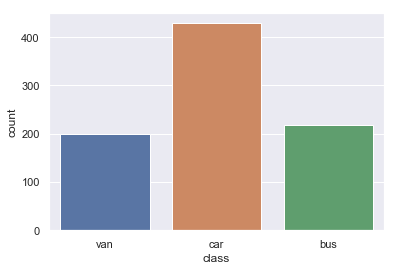

In [7]:
# Distribution of target column 'class'
import seaborn as sns
sns.set(color_codes=True)
print(veh_df['class'].value_counts(),'\n')
sns.countplot(veh_df['class']);

Cars have highest cunt  followed by bus and then vans.
The data is not distributed equally for the 3 vehicle classes. Almost 50% of the data belongs to car class.

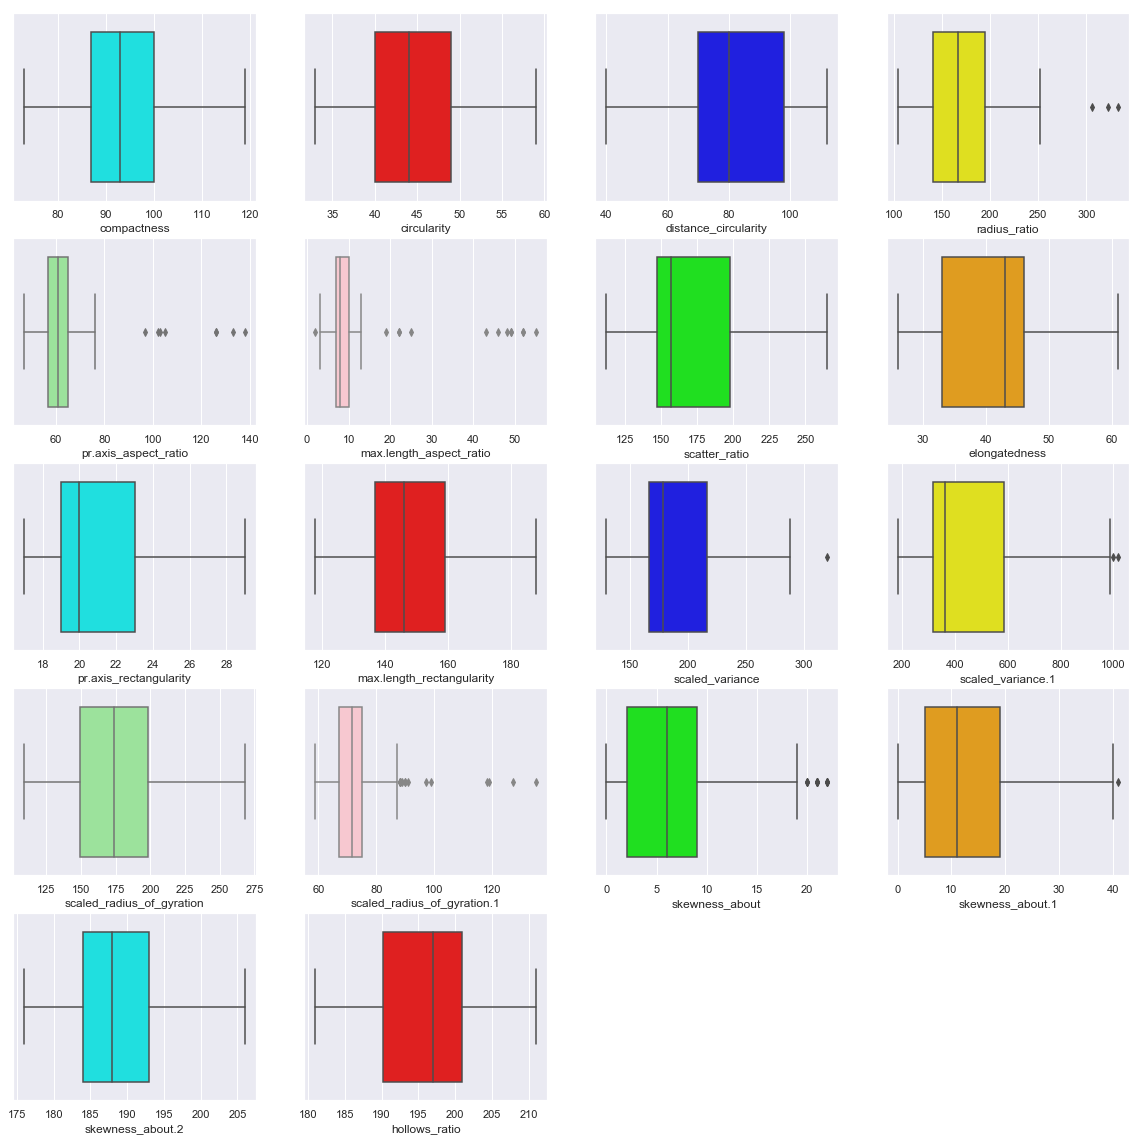

In [8]:
temp=veh_df.columns.drop(["class"])
plt.figure(figsize=(20,20)) 
colors = ['cyan','red','blue','yellow','lightgreen','pink','lime','orange','cyan','red','blue','yellow','lightgreen','pink','lime','orange','cyan','red','blue','yellow','lightgreen']
for col in temp:
    index = veh_df.columns.get_loc(col)
    plt.subplot(5,4,index+1)
    box=sns.boxplot(x=col, data=veh_df, orient="h",color=colors[index])

radius_ratio, axis_aspect_ration, length_aspect_ratio & scaled_radius_of_gyration.1 columns have outliers (right tail) 
All the columns mean is greater than the median (data are rightly skewed), so we will use median to handle the missing values.

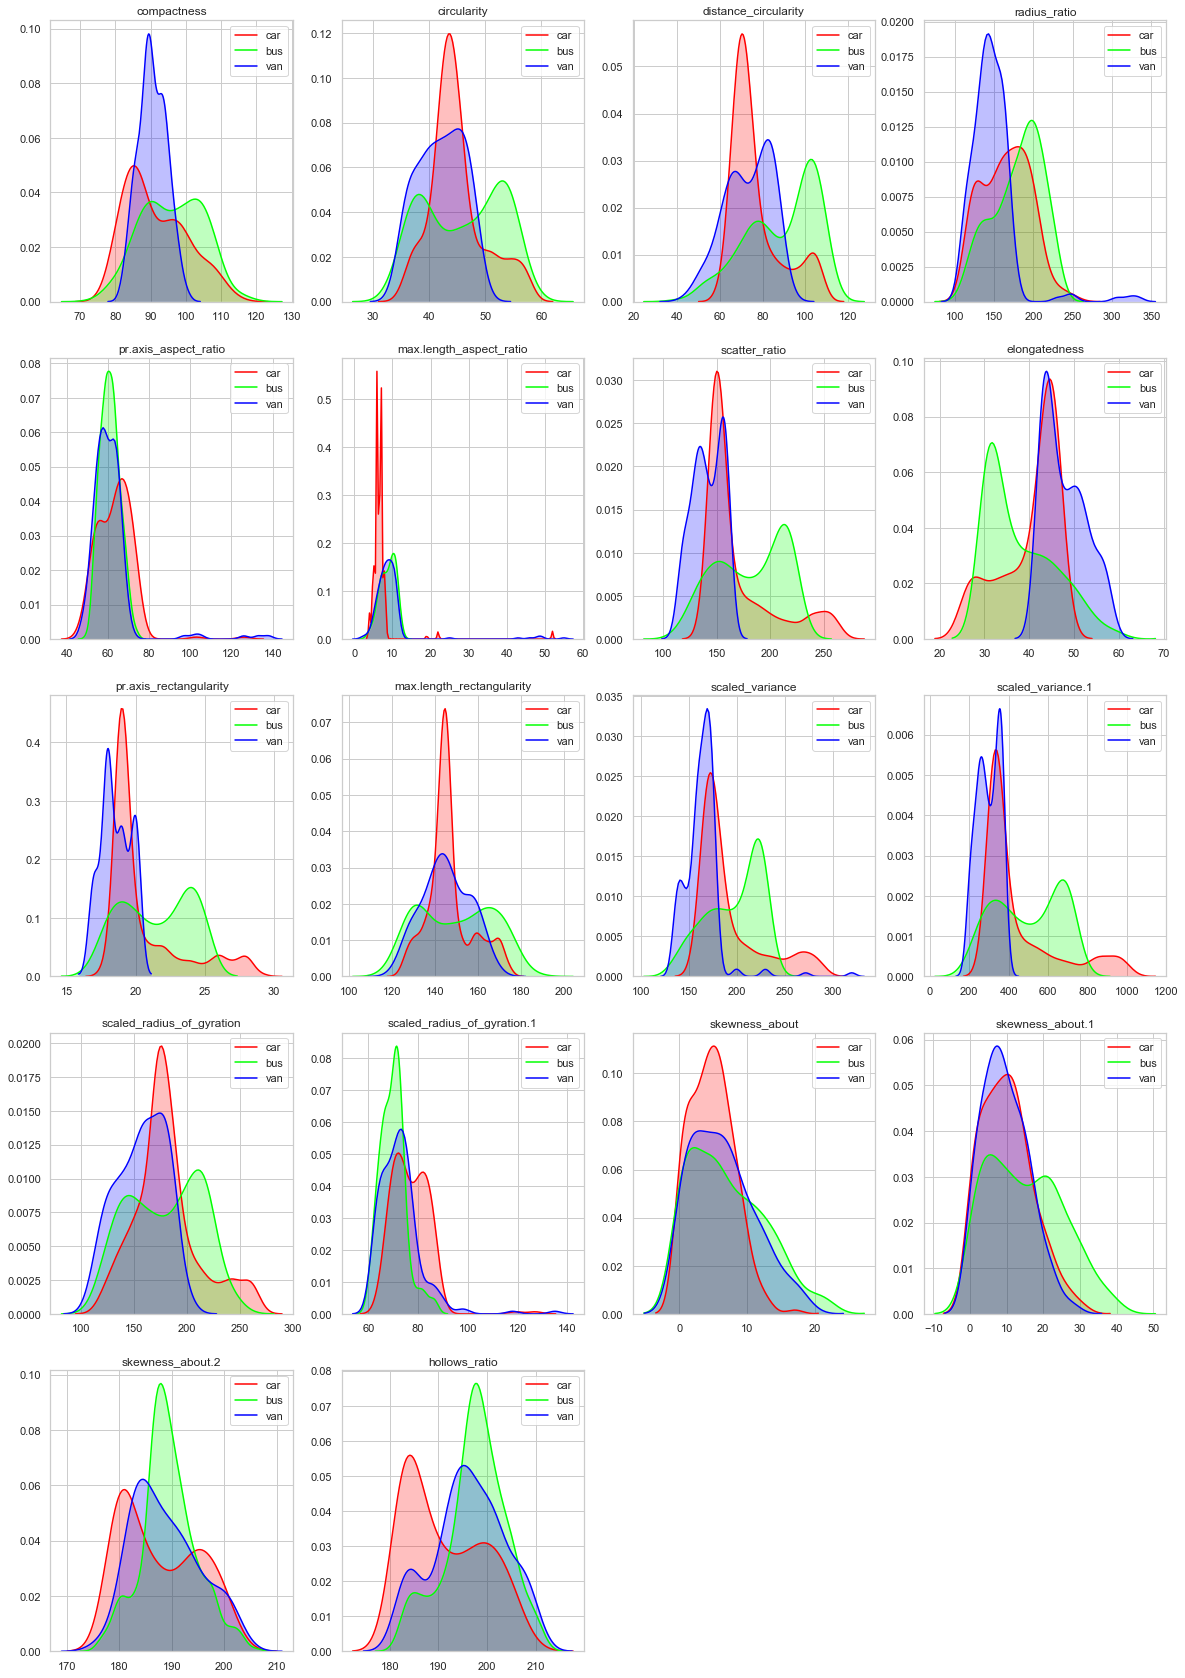

In [43]:
# kde plots to show the distribution of the all the variables with respect to dependent variable
k=1
plt.figure(figsize=(20,30))
sns.set(style='whitegrid',color_codes=True)
for col in veh_df.columns[0:18]:
    plt.subplot(5,4,k)
    sns.kdeplot(veh_df[veh_df['class']==0][col],color='red',label='car',shade=True)
    sns.kdeplot(veh_df[veh_df['class']==1][col],color='lime',label='bus',shade=True)
    sns.kdeplot(veh_df[veh_df['class']==2][col],color='blue',label='van',shade=True)
    plt.title(col)
    k=k+1


Spread of compactness is least for van. Mean compactness is highest for car. For Bus compactness is right skewed indicating that less number of buses have high compactness.
Mean circularity is higher for cars
Mean distance_circularity is also higher for cars
pr.axis_aspect_ratio is has almost same distribution for car, van and buses
'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', have almost similar distribution for cars, buses and vans

In [10]:
#replace missing variable(' ')
veh_df = veh_df.replace(' ', np.nan)
veh_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

###### Handling the Missing values

In [11]:

#Replacing the missing values by median 
for i in veh_df.columns[:17]:
    veh_df[i] = veh_df[i].fillna(veh_df[i].median())
    
veh_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [12]:
#Rechecking missing values
veh_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [13]:
#duplicate values
veh_df.duplicated().sum()  

0

In [14]:
#Encoding of categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
veh_df['class']=labelencoder_X.fit_transform(veh_df['class'])

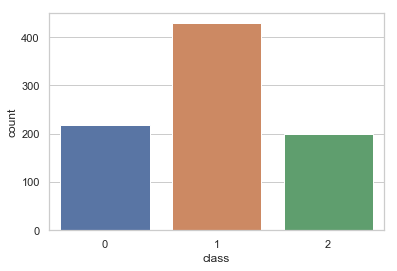

In [15]:
sns.countplot(veh_df['class']);

#### Multivariate Analysis

In [16]:
#correlation matrix
cor=veh_df.corr()
cor

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   
class                           -0.182186             -0.098178   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                            

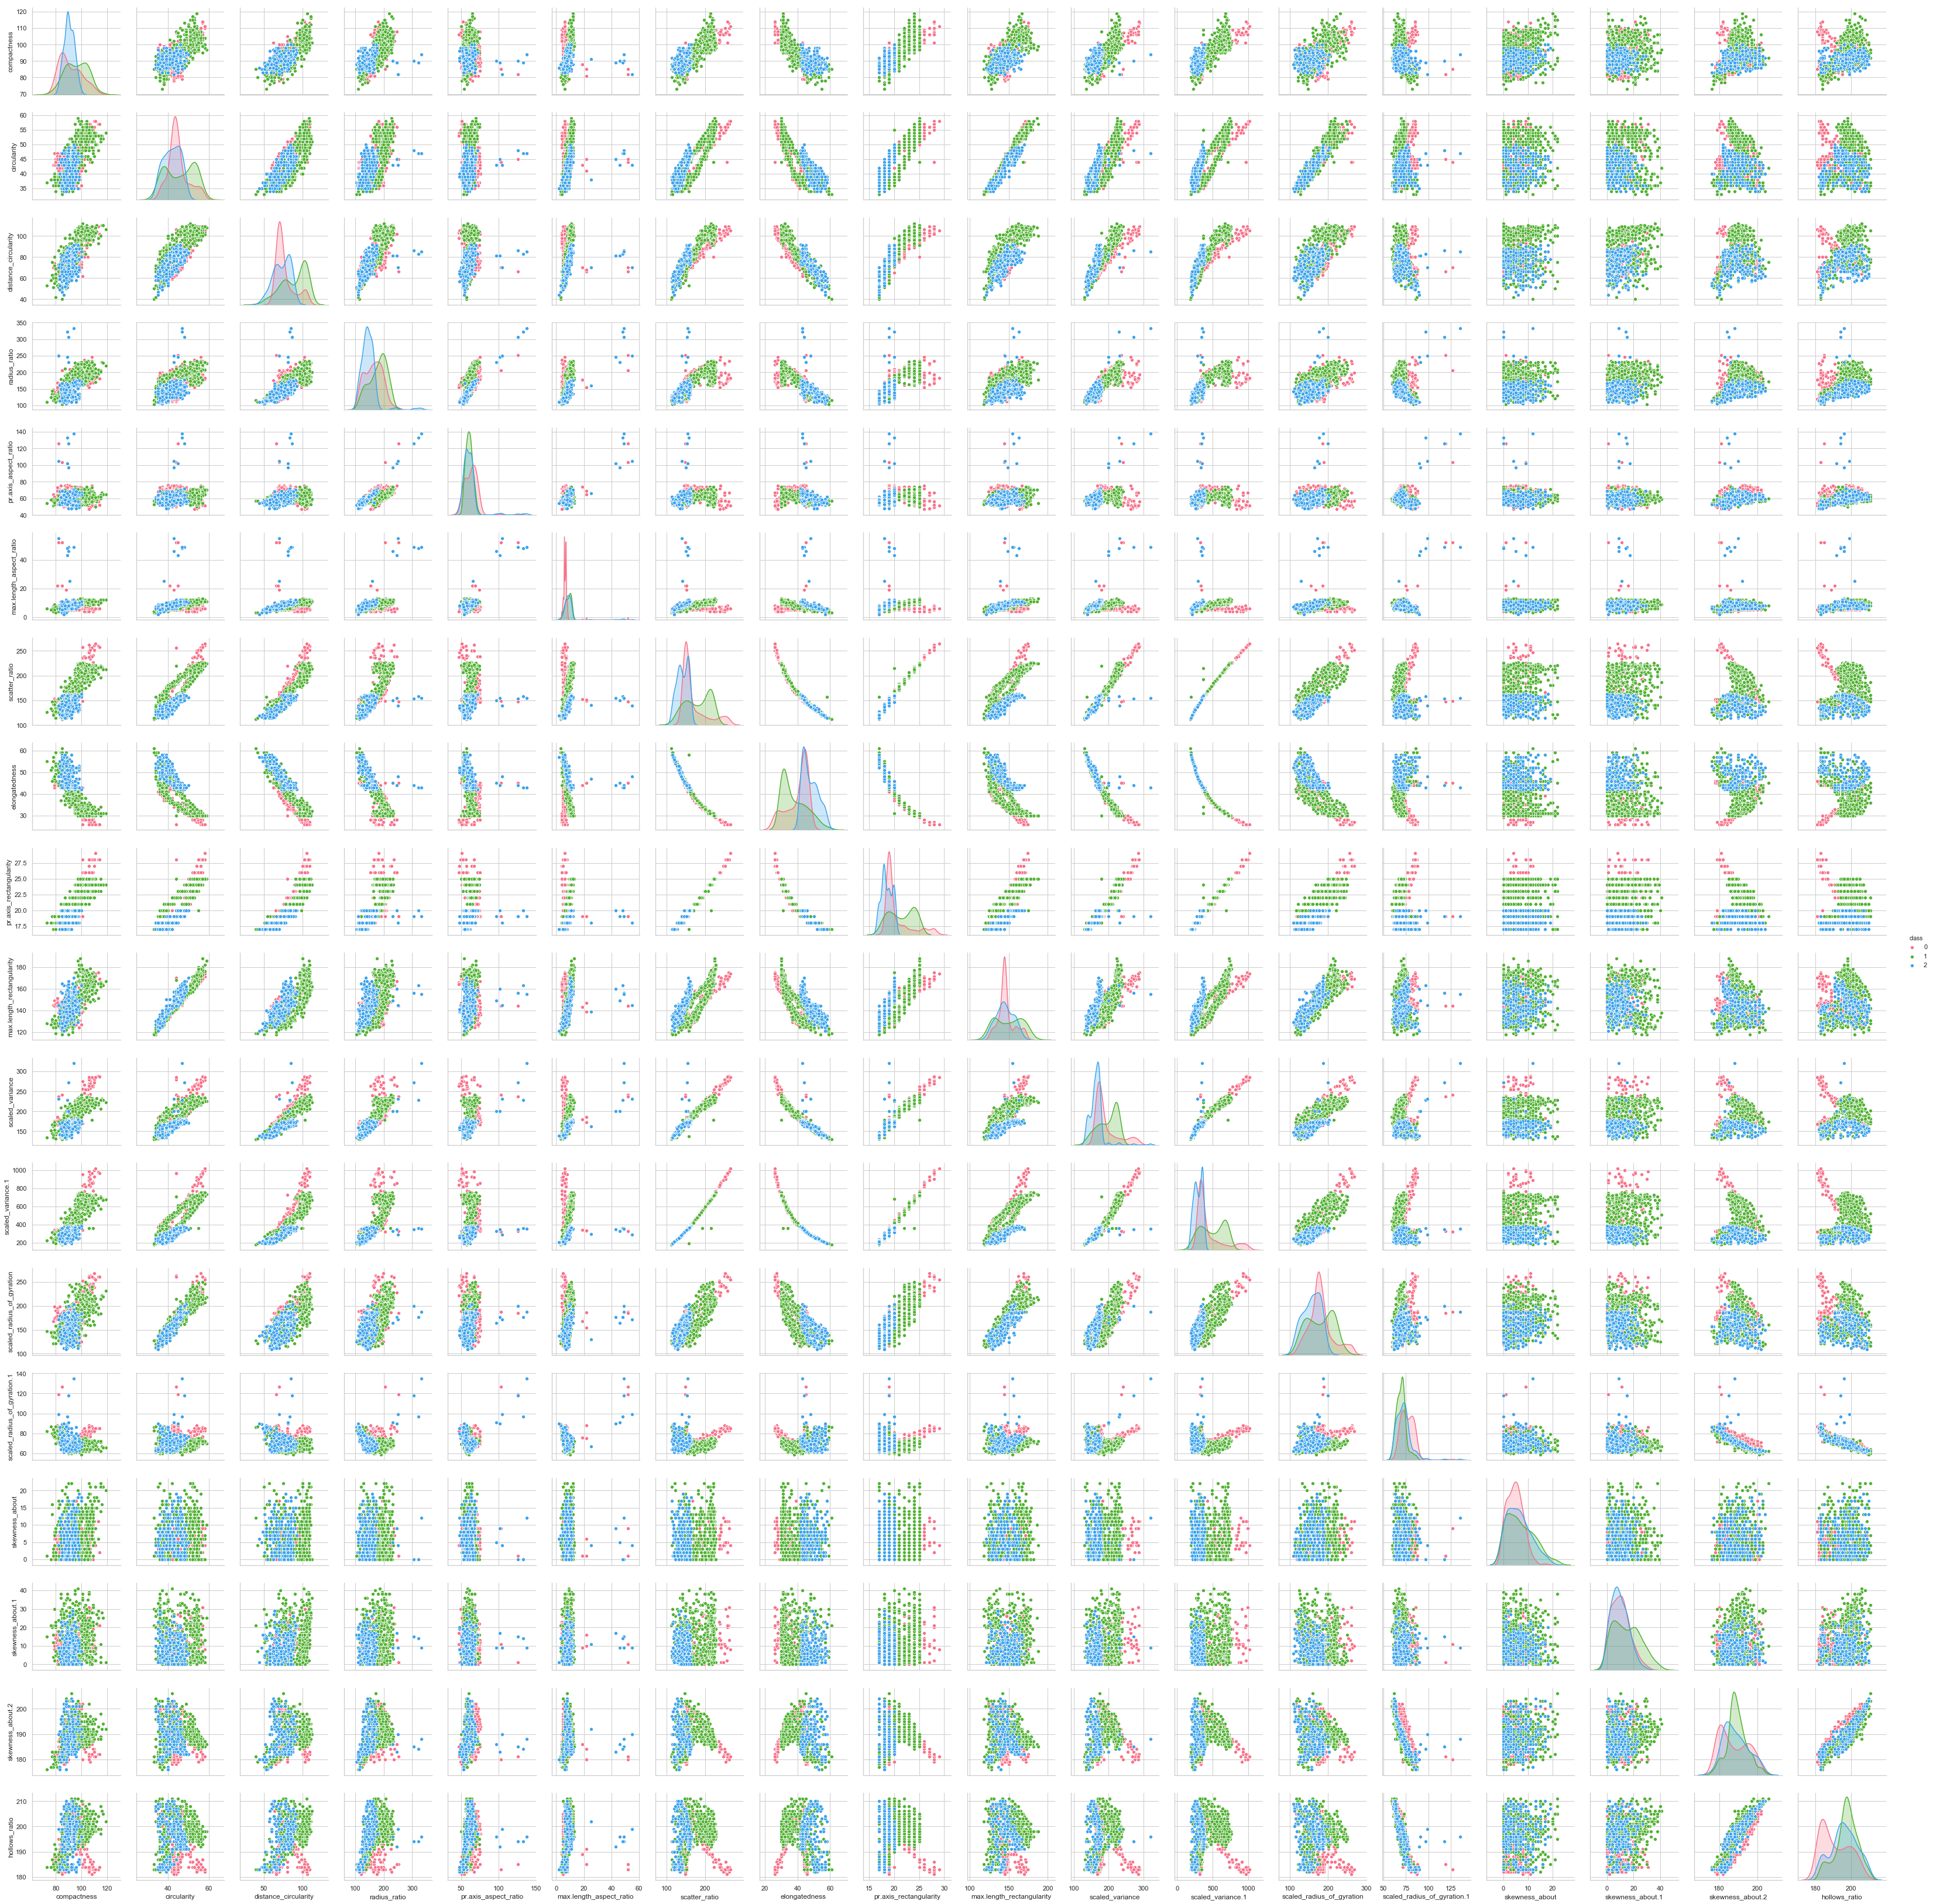

In [17]:
sns.pairplot(veh_df,diag_kind='kde',hue='class', palette='husl')

The above pair plots we can see that many columns are correlated among them, 
this leads to multi-collinearity and many columns have long tail so that is the indication of outliers.

Text(0.5,1,'Correlation Matrix')

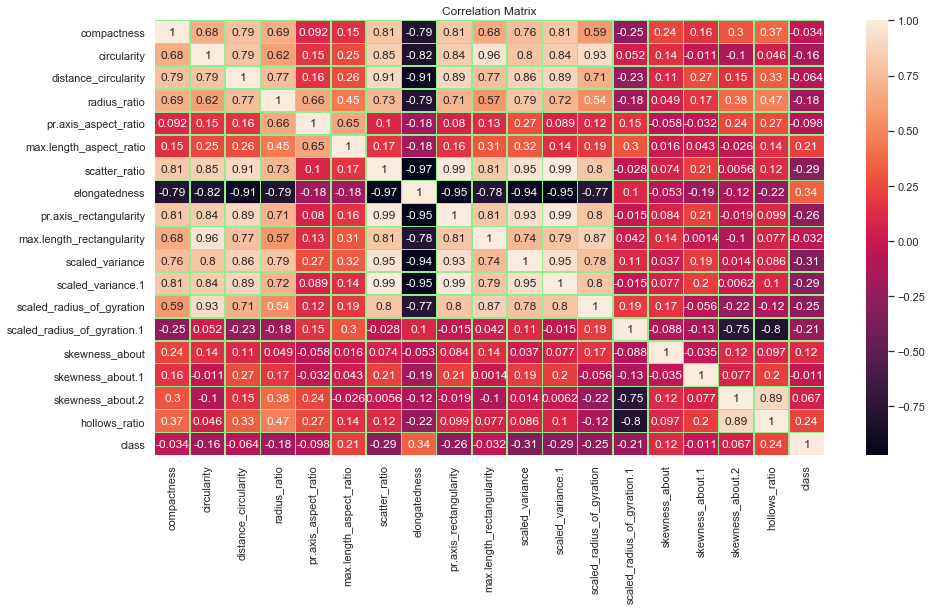

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(veh_df.corr(), linewidths=0.5,vmax=1.0, 
            linecolor='lightgreen', annot=True)
plt.title('Correlation Matrix')

From above correlation matrix, there are many features which are highly correlated.
and many other features also there which having more than 0.9 (positive and negative) 
      - Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.98
      - skewness_about_2 and hollow_ratio seems to be strongly correlated, corr coeff: 0.89
      - distance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.81
      - compactness & circularity , radius_ratio & pr.axis_aspect_ratio also seems ver averagely correlated with coeff: 0.67.
      - scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated with corr coeff: 0.79
      - pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with coeff: 0.81 
      - scatter_ratio and elongatedness seems to be have strong negative correlation val : 0.97
      - elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  0.95
        
There are many features which are highly correlated and it is difficult to determine which dimensions to drop manually


The objective of the Project is to recognize whether an object is a van or bus or car based on some input features. 
so our main assumption is there is little or no multicollinearity between the features. 
All the features should be independent with one another, 
if two features are highly correlated then there is no use in using both features.


From above correlation matrix we observed that more than 50 % of the  attributes ar highly correlated. If we carefully analyse, we will find that many features are there which having more than 0.9 correlation. We can drop the attributes which are highly correlated with each other by setting threshold (0.9)
There are 8 such columns:

    -max.length_rectangularity
    -scaled_radius_of_gyration
    -skewness_about.2
    -scatter_ratio
    -elongatedness
    -pr.axis_rectangularity
    -scaled_variance
    -scaled_variance.1


    
    Another soluton is to use a dimension reduction algorithm such as Principal Component Analysis (PCA).
    it will take care of multicollinearity and gives us the the variables which are independent to each other.
    for the outliers, pca decides how it will explain above data which is in high dimension with smaller number of variables   

## 3. Split the data into train and test

In [19]:
#independent and dependent variables
X = veh_df.iloc[:,0:18]
y = veh_df.iloc[:,18]

In [20]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

# Scaling the data using zscore technique as the predictor values has different scale
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

X_train, X_test, y_train, y_test = train_test_split(XScaled,y, test_size = 0.3, random_state = 2)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(592, 18)
(592,)
(254, 18)
(254,)


## 4. Train a Support vector machine using the train set and get the accuracy on the test set

In [22]:
from sklearn import svm
from sklearn.svm import SVC   

# instantiating the model
svm_model = SVC()

# fitting the model
svm_model.fit(X_train, y_train)

# score on unseen data
accuracy_svm = svm_model.score(X_test,y_test)

In [23]:
# check the accuracy on the training data
print('Accuracy on Training data: ',svm_model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', svm_model.score(X_test , y_test))

Accuracy on Training data:  0.9797297297297297
Accuracy on Testing data:  0.9645669291338582


## 5. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [24]:
covMatrix = np.cov(XScaled,rowvar=False)
pd.DataFrame(covMatrix)

0         1         2         3         4         5         6   \
0   1.001183  0.685698  0.790863  0.690560  0.091643  0.148425  0.813582   
1   0.685698  1.001183  0.793258  0.621647  0.153960  0.251764  0.848941   
2   0.790863  0.793258  1.001183  0.767942  0.158643  0.265000  0.906147   
3   0.690560  0.621647  0.767942  1.001183  0.664232  0.450584  0.735298   
4   0.091643  0.153960  0.158643  0.664232  1.001183  0.649491  0.103855   
5   0.148425  0.251764  0.265000  0.450584  0.649491  1.001183  0.166388   
6   0.813582  0.848941  0.906147  0.735298  0.103855  0.166388  1.001183   
7  -0.789683 -0.822444 -0.912385 -0.790416 -0.183252 -0.180353 -0.972751   
8   0.814657  0.844398  0.894082  0.709224  0.079698  0.161693  0.990922   
9   0.676943  0.962456  0.775444  0.569623  0.127059  0.306305  0.810041   
10  0.762972  0.797248  0.862539  0.794354  0.273233  0.319334  0.949785   
11  0.814976  0.836935  0.887066  0.719286  0.089294  0.143423  0.994187   
12  0.585935  0.926912  0.706607  0.537007  0.122115  0.189967  0.800821   
13 -0.249888  0.052008 -0.226211 -0.180611  0.153131  0.296085 -0.027574   
14  0.236358  0.144368  0.114059  0.048770 -0.058440  0.015618  0.074546   
15  0.157200 -0.011452  0.265861  0.173946 -0.032014  0.043473  0.212680   
16  0.298890 -0.104550  0.146271  0.382666  0.240170 -0.026111  0.005634   
17  0.365984  0.046406  0.333126  0.471867  0.268042  0.144089  0.118958   

          7         8         9         10        11        12        13  \
0  -0.789683  0.814657  0.676943  0.762972  0.814976  0.585935 -0.249888   
1  -0.822444  0.844398  0.962456  0.797248  0.836935  0.926912  0.052008   
2  -0.912385  0.894082  0.775444  0.862539  0.887066  0.706607 -0.226211   
3  -0.790416  0.709224  0.569623  0.794354  0.719286  0.537007 -0.180611   
4  -0.183252  0.079698  0.127059  0.273233  0.089294  0.122115  0.153131   
5  -0.180353  0.161693  0.306305  0.319334  0.143423  0.189967  0.296085   
6  -0.972751  0.990922  0.810041  0.949785  0.994187  0.800821 -0.027574   
7   1.001183 -0.950119 -0.776772 -0.937490 -0.954945 -0.767221  0.103424   
8  -0.950119  1.001183  0.811893  0.935333  0.989383  0.797632 -0.015514   
9  -0.776772  0.811893  1.001183  0.745866  0.795555  0.867476  0.041671   
10 -0.937490  0.935333  0.745866  1.001183  0.946797  0.779838  0.113212   
11 -0.954945  0.989383  0.795555  0.946797  1.001183  0.795958 -0.015419   
12 -0.767221  0.797632  0.867476  0.779838  0.795958  1.001183  0.191699   
13  0.103424 -0.015514  0.041671  0.113212 -0.015419  0.191699  1.001183   
14 -0.052662  0.083866  0.136012  0.036772  0.076968  0.166680 -0.088460   
15 -0.185272  0.214955  0.001367  0.194468  0.201048 -0.056220 -0.126332   
16 -0.115262 -0.018671 -0.104071  0.014236  0.006226 -0.224716 -0.749751   
17 -0.217161  0.099404  0.076860  0.085797  0.103057 -0.118141 -0.803072   

          14        15        16        17  
0   0.236358  0.157200  0.298890  0.365984  
1   0.144368 -0.011452 -0.104550  0.046406  
2   0.114059  0.265861  0.146271  0.333126  
3   0.048770  0.173946  0.382666  0.471867  
4  -0.058440 -0.032014  0.240170  0.268042  
5   0.015618  0.043473 -0.026111  0.144089  
6   0.074546  0.212680  0.005634  0.118958  
7  -0.052662 -0.185272 -0.115262 -0.217161  
8   0.083866  0.214955 -0.018671  0.099404  
9   0.136012  0.001367 -0.104071  0.076860  
10  0.036772  0.194468  0.014236  0.085797  
11  0.076968  0.201048  0.006226  0.103057  
12  0.166680 -0.056220 -0.224716 -0.118141  
13 -0.088460 -0.126332 -0.749751 -0.803072  
14  1.001183 -0.035032  0.115434  0.097241  
15 -0.035032  1.001183  0.077402  0.205233  
16  0.115434  0.077402  1.001183  0.893638  
17  0.097241  0.205233  0.893638  1.001183

In [25]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
# Eigen values
pca.explained_variance_

array([9.40460261e+00, 3.01492206e+00, 1.90352502e+00, 1.17993747e+00,
       9.17260633e-01, 5.39992629e-01, 3.58870118e-01, 2.21932456e-01,
       1.60608597e-01, 9.18572234e-02, 6.64994118e-02, 4.66005994e-02,
       3.57947189e-02, 2.74120657e-02, 2.05792871e-02, 1.79166314e-02,
       1.00257898e-02, 2.96445743e-03])

In [27]:
# Eigen Vectors
pd.DataFrame(pca.components_)

0         1         2         3         4         5         6   \
0   0.275284  0.293258  0.304609  0.267607  0.080504  0.097276  0.317093   
1  -0.126954  0.125577 -0.072952 -0.189634 -0.122175  0.010748  0.048118   
2  -0.119922 -0.024821 -0.056014  0.275074  0.642013  0.591801 -0.097628   
3   0.078384  0.187337 -0.071201 -0.042605  0.032726  0.031415 -0.095749   
4   0.069518 -0.085065  0.040665 -0.046147 -0.040549  0.213433 -0.015485   
5   0.144875 -0.302731 -0.138406  0.248137  0.236933 -0.419331  0.116100   
6   0.451862 -0.249103  0.074035 -0.176913 -0.397877  0.503414  0.064988   
7  -0.566137 -0.179852  0.434749  0.101998 -0.068715  0.161153  0.100688   
8  -0.484418 -0.014157 -0.167572 -0.230314 -0.277128  0.148032  0.054457   
9  -0.260076  0.098078 -0.205032 -0.047789  0.108075 -0.118266  0.165167   
10  0.046534  0.003013  0.706489 -0.107152  0.038517 -0.262254 -0.170406   
11  0.012034 -0.213635  0.000346 -0.157050  0.110107 -0.132935  0.095588   
12  0.156137  0.015012 -0.237111 -0.030782 -0.039280  0.037288  0.039464   
13 -0.060049  0.426993 -0.146240  0.521375 -0.363120 -0.062780 -0.064050   
14 -0.009678 -0.597863 -0.157257  0.166552 -0.063614 -0.086317 -0.079869   
15 -0.065096 -0.261245  0.078265  0.560792 -0.322277  0.048781  0.018184   
16  0.006005 -0.073806  0.025079  0.035988 -0.012585  0.028417  0.249653   
17 -0.010073 -0.009159  0.006946 -0.042016  0.031270 -0.009999  0.840976   

          7         8         9         10        11        12        13  \
0  -0.314133  0.313959  0.282831  0.309280  0.313788  0.272047 -0.020814   
1   0.012750  0.059935  0.116221  0.062281  0.053784  0.209233  0.488525   
2   0.057648 -0.109512 -0.017064  0.056324 -0.108841 -0.031464  0.286277   
3   0.082290 -0.092458  0.188006 -0.119844 -0.091745  0.200095 -0.065505   
4   0.076852  0.002176 -0.060637 -0.000456 -0.019555 -0.061599  0.145530   
5  -0.141840  0.098056 -0.461675  0.236225  0.157820 -0.135576  0.241357   
6   0.013811  0.096657 -0.104552  0.114623  0.083735 -0.373944  0.111953   
7  -0.215497  0.063593 -0.249496  0.050210  0.043765 -0.108474 -0.340878   
8  -0.156867  0.005250 -0.061036  0.297588  0.083367  0.241655  0.320222   
9  -0.151612  0.193778  0.469060 -0.129986  0.158204 -0.686494  0.127648   
10 -0.057663 -0.272514  0.141434  0.077260 -0.243226 -0.158888  0.419189   
11  0.122013  0.251281 -0.124529 -0.215012  0.175685  0.190336  0.285711   
12 -0.810395 -0.271573 -0.075711 -0.153181 -0.307948  0.037609  0.043465   
13  0.186946 -0.180913 -0.174070  0.277272 -0.078514 -0.200684  0.146862   
14  0.042152 -0.144491  0.511259  0.453237 -0.126992  0.109983 -0.111272   
15 -0.025033  0.164491  0.147280 -0.564445 -0.068586  0.147099  0.232941   
16  0.042148 -0.717396  0.047023 -0.171504  0.616589  0.026491  0.014296   
17  0.238189 -0.101155 -0.016948  0.006047 -0.469203  0.011748  0.003148   

          14        15        16        17  
0   0.041456  0.058225  0.030280  0.074145  
1  -0.055090 -0.124085 -0.540915 -0.540354  
2  -0.115679 -0.075283  0.008736  0.039524  
3   0.604794 -0.666114  0.105526  0.047489  
4   0.729190  0.599196 -0.100602 -0.029861  
5   0.203209 -0.191961  0.156939 -0.241223  
6  -0.080633 -0.284559  0.018145  0.015724  
7   0.156488 -0.208774 -0.304580 -0.030419  
8   0.022105  0.010176  0.517223  0.171506  
9   0.098364 -0.035515  0.019396  0.064131  
10 -0.012545 -0.032781  0.120598  0.091960  
11 -0.001603 -0.083259 -0.353724  0.685618  
12  0.009943  0.026892 -0.186595  0.142380  
13  0.017336 -0.031369 -0.231451  0.288502  
14  0.024094 -0.009897 -0.182212  0.090401  
15 -0.027759  0.002782  0.190630 -0.120966  
16 -0.001743  0.007089 -0.007679 -0.006377  
17 -0.003032 -0.012532  0.043428 -0.006477

In [28]:
#Finding eigenvalues amd eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


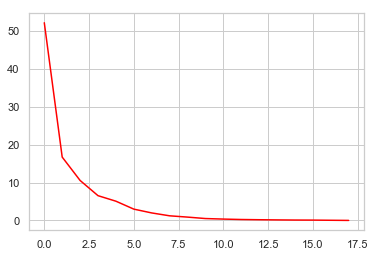

In [29]:
#Finding variance and cummulative variance by each eigenvector

tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.plot(var_exp,color='red')

In [30]:
#Printing the % of variance explained by each principle component from 1 to 18 
# (as there are 18 independent columns in our dataset)
k = 1
total = []
for i in pca.explained_variance_ratio_*100:
    print('Variance explained by Principle Component',k,'is : {:.2f}%'.format(i))
    k+=1
    total.append(i)
print('\nTotal variance explained by all the principle components:',sum(total),'%')

Variance explained by Principle Component 1 is : 52.19%
Variance explained by Principle Component 2 is : 16.73%
Variance explained by Principle Component 3 is : 10.56%
Variance explained by Principle Component 4 is : 6.55%
Variance explained by Principle Component 5 is : 5.09%
Variance explained by Principle Component 6 is : 3.00%
Variance explained by Principle Component 7 is : 1.99%
Variance explained by Principle Component 8 is : 1.23%
Variance explained by Principle Component 9 is : 0.89%
Variance explained by Principle Component 10 is : 0.51%
Variance explained by Principle Component 11 is : 0.37%
Variance explained by Principle Component 12 is : 0.26%
Variance explained by Principle Component 13 is : 0.20%
Variance explained by Principle Component 14 is : 0.15%
Variance explained by Principle Component 15 is : 0.11%
Variance explained by Principle Component 16 is : 0.10%
Variance explained by Principle Component 17 is : 0.06%
Variance explained by Principle Component 18 is : 0.02

The First principal component is a linear combination of original predictor variables which captures the maximum variance i.e. 52% in the data set followed by two,three and so on... It determines the direction of highest variability in the data.

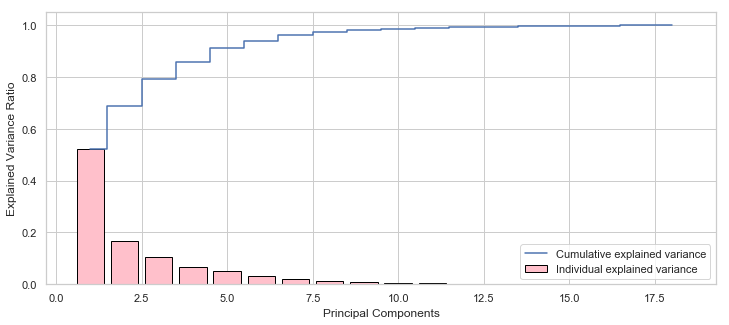

In [31]:
# Implementing plot 
plt.figure(figsize=(12 , 5))
plt.bar(range(1, 19), pca.explained_variance_ratio_, label = 'Individual explained variance',color='pink',edgecolor='black')
plt.step(range(1, 19), np.cumsum(pca.explained_variance_ratio_),where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.show()

Drop in variance explained with increase in number the number of Principal Components.
### Also, top 7 principal components contribute 95% variance (information). So, we can proceed further with 7 components

In [32]:
#Generating only 7 PCA dimensions (dimensionality reduction from 18 to 7)
# specifying 7 PC components in the parameter called n_components=7
pca2 = PCA(n_components=7)  
pca2.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
# Eigen Vectors (transformed into 7 dimensions)
pd.DataFrame(pca2.components_).T

0         1         2         3         4         5         6
0   0.275284 -0.126954 -0.119922  0.078384  0.069518  0.144875  0.451862
1   0.293258  0.125577 -0.024821  0.187337 -0.085065 -0.302731 -0.249103
2   0.304609 -0.072952 -0.056014 -0.071201  0.040665 -0.138406  0.074035
3   0.267607 -0.189634  0.275074 -0.042605 -0.046147  0.248137 -0.176913
4   0.080504 -0.122175  0.642013  0.032726 -0.040549  0.236933 -0.397877
5   0.097276  0.010748  0.591801  0.031415  0.213433 -0.419331  0.503414
6   0.317093  0.048118 -0.097628 -0.095749 -0.015485  0.116100  0.064988
7  -0.314133  0.012750  0.057648  0.082290  0.076852 -0.141840  0.013811
8   0.313959  0.059935 -0.109512 -0.092458  0.002176  0.098056  0.096657
9   0.282831  0.116221 -0.017064  0.188006 -0.060637 -0.461675 -0.104552
10  0.309280  0.062281  0.056324 -0.119844 -0.000456  0.236225  0.114623
11  0.313788  0.053784 -0.108841 -0.091745 -0.019555  0.157820  0.083735
12  0.272047  0.209233 -0.031464  0.200095 -0.061599 -0.135576 -0.373944
13 -0.020814  0.488525  0.286277 -0.065505  0.145530  0.241357  0.111953
14  0.041456 -0.055090 -0.115679  0.604794  0.729190  0.203209 -0.080633
15  0.058225 -0.124085 -0.075283 -0.666114  0.599196 -0.191961 -0.284559
16  0.030280 -0.540915  0.008736  0.105526 -0.100602  0.156939  0.018145
17  0.074145 -0.540354  0.039524  0.047489 -0.029861 -0.241223  0.015724

In [34]:
# Eigen Values (only 7)
pca2.explained_variance_

array([9.40460261, 3.01492206, 1.90352502, 1.17993747, 0.91726063,
       0.53999263, 0.35887012])

In [35]:
# Percentage of variance explained by 7 PC components
sum(pca2.explained_variance_ratio_*100)

96.10354875345355

In [36]:
# Transforming the impute raw data which is in 18 dimension into 7 new dimension with pca
pca_transformed =  pca2.transform(XScaled)

In [37]:
# checking the shape of pca_transformed data
pca_transformed.shape

(846, 7)

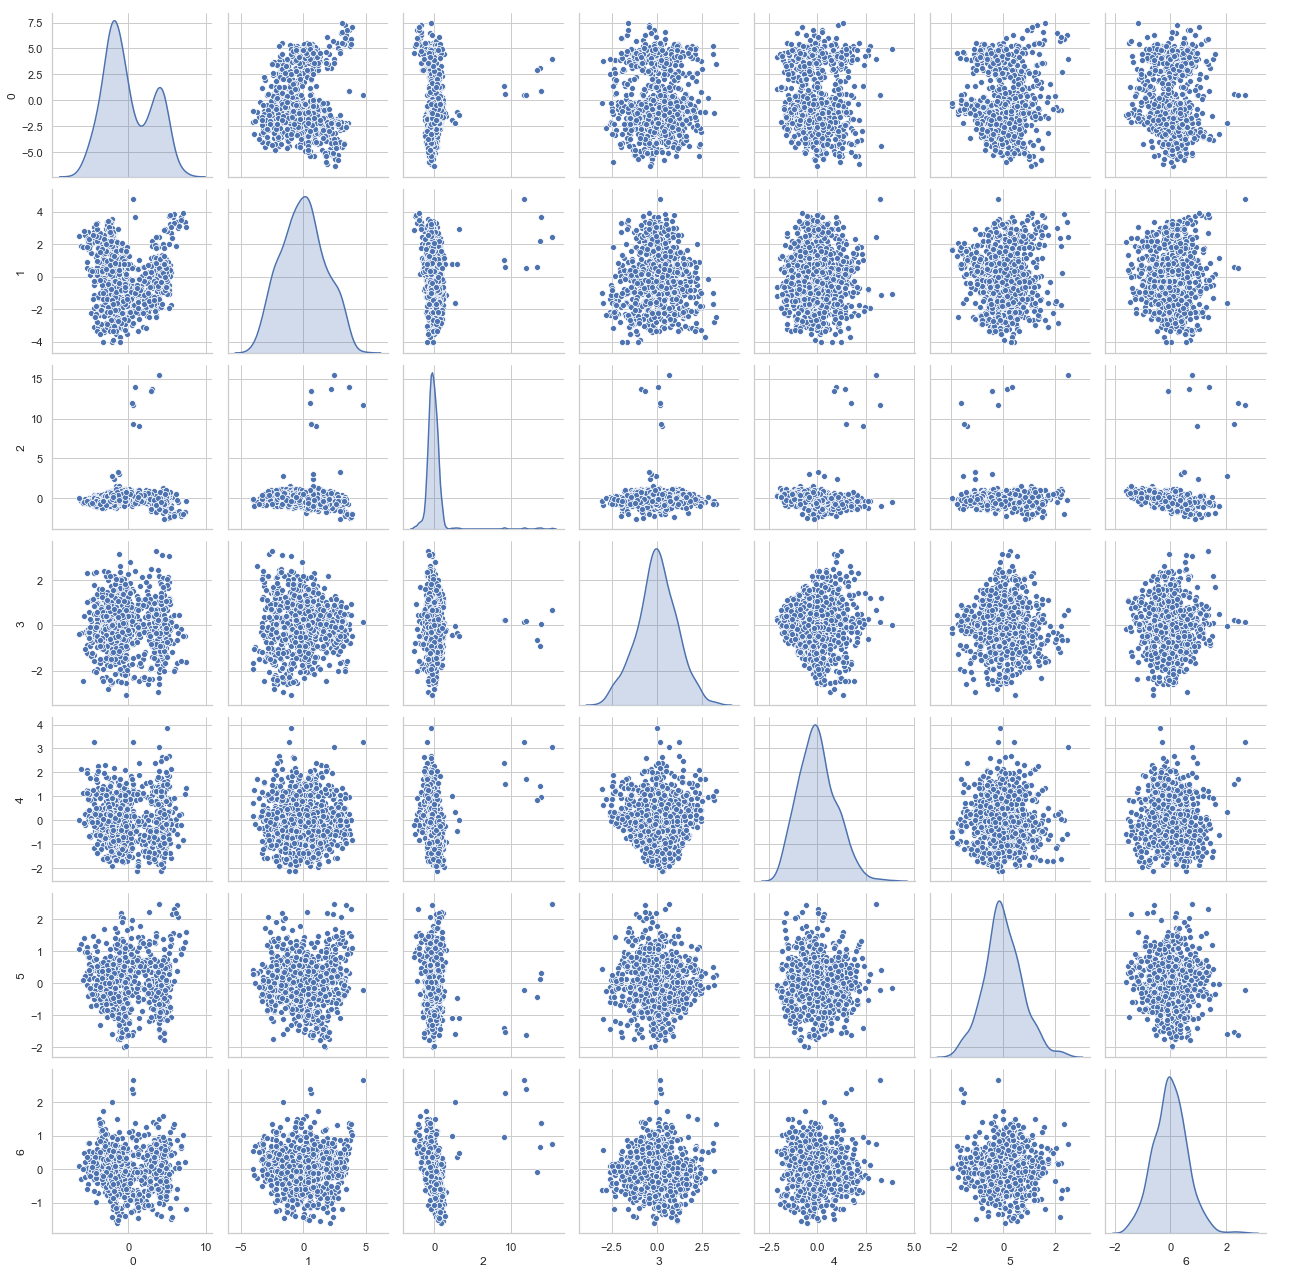

In [38]:
# Visualising PCA dimensions with pair panel
sns.pairplot(pd.DataFrame(pca_transformed),diag_kind = 'kde')

The PCA reduced dimension  pairplot shows there is no Collinearity between the variables, 
hence correlation is close to zero. So we could able to decrease the correlation between independent variables
Going forward only with 7 columns we will be able to build the model which should give almost same accuracy as the model with 18 dimensions.

## 6. Train a Support vector machine using the Principal Components and get the accuracy on the test set

In [39]:
# split the transformed pca data
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_transformed, y, test_size = 0.3, random_state = 2)

# Shape of new train and test data
print('   Transformed data using pca ')
print('   shape of pca_x_train:',pca_X_train.shape)
print('   shape of pca_y_train:',pca_y_train.shape)
print('   shape of pca_x_test:',pca_X_test.shape)
print('   shape of pca_y_test:',pca_y_test.shape)

   Transformed data using pca 
   shape of pca_x_train: (592, 7)
   shape of pca_y_train: (592,)
   shape of pca_x_test: (254, 7)
   shape of pca_y_test: (254,)


In [40]:
# Building the svm model using principal components instead of original data
svm_pca = SVC()

# fitting the model on new data
svm_pca.fit(pca_X_train, pca_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
# score of test data
accuracy_svm_pca = svm_pca.score(pca_X_test,pca_y_test)
print('Accuracy score of SVM model after reducing dimensions :',svm_pca.score(pca_X_test,pca_y_test),'\n\n')


Accuracy score of SVM model after reducing dimensions : 0.9015748031496063 




In [42]:
scores_df = pd.DataFrame({ 'Model' : 'SVM',  'Accuracy' : [accuracy_svm*100] })
scores_df1 = pd.DataFrame({'Model': ['SVM with PCA'], 'Accuracy' : [accuracy_svm_pca*100]})
scores_df = pd.concat([scores_df,scores_df1]).drop_duplicates()
scores_df

Model   Accuracy
0           SVM  96.456693
0  SVM with PCA  90.157480

##### From above it is observed that model is getting better accuracy even with only 7 variables/principle components instead of 18 attributes.

##### it's nearly close to the accuracy which we got with raw data

Accuracy with PCA is approximately 90% and with the raw data we are getting 96% of the accuracy 
It is noted that pca 90% accuracy is with only 7 dimensions where as rawdata has 18 dimensions. 

Disadvantage of PCA is we cannot do interpretation with the model much.

In feature extraction(PCA), we created 18 new independent variables, where each new independent variable is a linear combination of each of the 18 old independent variables. However, we create these new independent variables in a specific way and order these new variables by how well they predict our dependent variable.

We keep as many of the new independent variables as we want, but we drop the least important ones, here we reduced them to 7 (to achieve 95% covarance) while still retaining the most valuable parts of all of the variables! 

Further performance of the models can be improved by doing hyper parameters tuning using Cross validation and GridSearchCV

By implementing PCA technique we overcome the issue of model complexity with more number of variables but less interpretability

# END